In [2]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [3]:
#infile = open("calo_data_output.csv", "r")
#readin = csv.reader(infile)

In [4]:
caloData = pandas.read_csv("./data/calo_data_output.csv")

In [5]:
caloData.head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,15937273,15937,27,5,513.0
1,1,15937275,15937,27,7,574.0
2,1,15937277,15937,27,9,571.0
3,1,15937279,15937,27,11,547.0
4,1,159372711,15937,27,14,471.0


In [6]:
caloData.loc[caloData['Global Bin'] == 15937273].head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,15937273,15937,27,5,513.0
20677,2,15937273,15937,27,5,508.0
41354,3,15937273,15937,27,5,642.0
62031,4,15937273,15937,27,5,624.0
82708,5,15937273,15937,27,5,655.0


In [7]:
caloData1 = caloData.loc[caloData['Calorimeter Number'] == 1]
caloData1.tail()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
20672,1,15928463145,15928,463,147,580.0
20673,1,15928463147,15928,463,149,518.0
20674,1,15928463149,15928,463,151,585.0
20675,1,15928463151,15928,463,154,439.0
20676,1,15928463154,15928,463,154,476.0


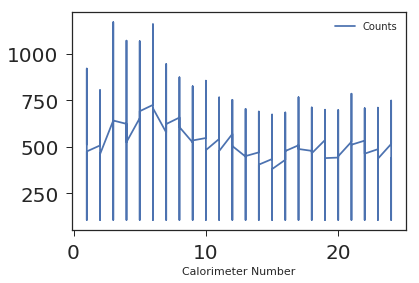

In [8]:
caloData.plot(y='Counts',x='Calorimeter Number')

In [9]:
data = []
for i in range(1,25):
    caloDatai = caloData.loc[caloData['Calorimeter Number'] == i]
    data.append(caloDatai['Counts'])

In [30]:
print(data[0])

0        513.0
1        574.0
2        571.0
3        547.0
4        471.0
5        541.0
6        611.0
7        663.0
8        562.0
9        595.0
10       605.0
11       482.0
12       460.0
13       526.0
14       568.0
15       539.0
16       601.0
17       638.0
18       412.0
19       493.0
20       650.0
21       648.0
22       564.0
23       608.0
24       568.0
25       509.0
26       515.0
27       582.0
28       587.0
29       514.0
         ...  
20647    452.0
20648    597.0
20649    597.0
20650    538.0
20651    509.0
20652    526.0
20653    479.0
20654    515.0
20655    609.0
20656    570.0
20657    519.0
20658    549.0
20659    628.0
20660    570.0
20661    505.0
20662    580.0
20663    596.0
20664    540.0
20665    569.0
20666    633.0
20667    608.0
20668    485.0
20669    591.0
20670    626.0
20671    563.0
20672    580.0
20673    518.0
20674    585.0
20675    439.0
20676    476.0
Name: Counts, Length: 20677, dtype: float64


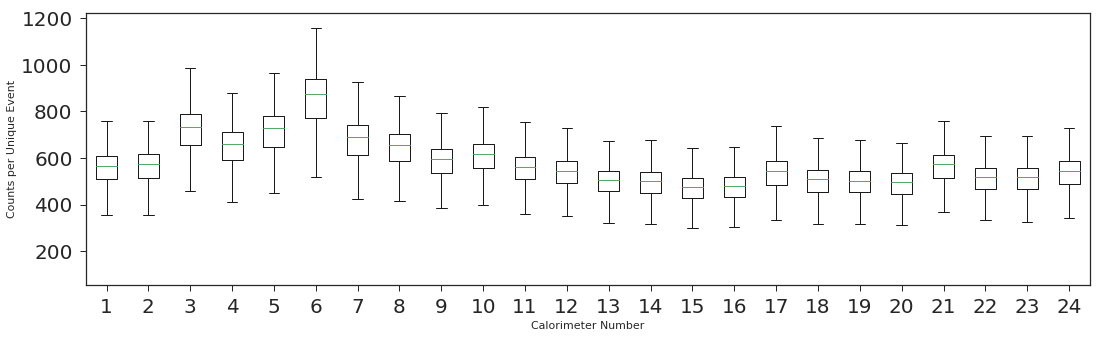

In [11]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.boxplot(data)
plt.xlabel('Calorimeter Number')
plt.ylabel('Counts per Unique Event')
plt.show()

Ok, this doesn't show the pattern that Kim was talking about earlier very clearly. Lets try to get the energy version and see from there

In [12]:
#caloDataEnergy = pandas.read_csv("./calo_data_output_energy2.csv")
caloDataEnergy = pandas.read_csv("./data/calo_data_output_energy_noConcatination.csv")
caloDataEnergy.head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,1593700270003,0,0,0,2217.825800
1,1,1593700270003,15937,27,3,2135.008314
2,1,1593700270003,15937,27,3,2071.256980
3,1,1593700270003,15937,27,3,2592.216307
4,1,1593700270003,15937,27,3,1914.840913


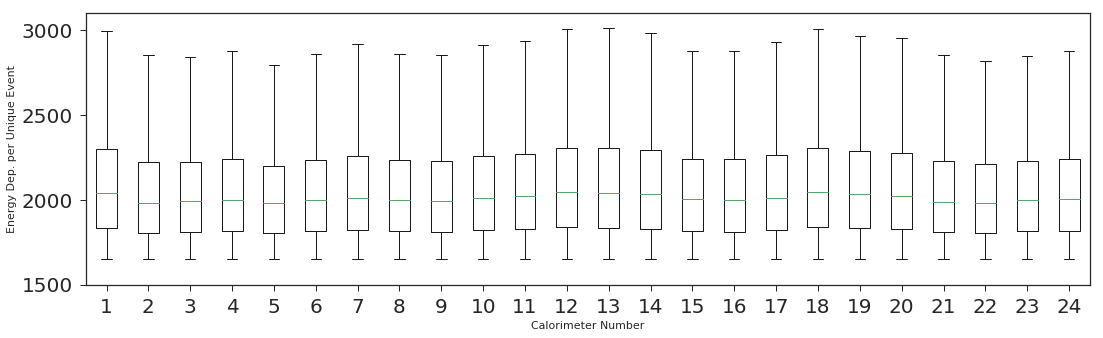

In [13]:
dataEnergy = []
for i in range(1,25):
    caloDatai = caloDataEnergy.loc[caloDataEnergy['Calorimeter Number'] == i]
    dataEnergy.append(caloDatai['Counts'])
#    print(caloDatai.describe())
fig, ax = plt.subplots(figsize=(18, 5))
ax.boxplot(dataEnergy)
plt.xlabel('Calorimeter Number')
plt.ylabel('Energy Dep. per Unique Event')
plt.ylim(1500,3100)
plt.show()

This doesn't show the pattern either. Calo 2 is perfectly well behaved according to these two metrics. 

Now lets implement an energy cut (1000 < E < 3000 MeV) and see if that changes anything

In [14]:
caloDataEnergyCut = pandas.read_csv("./data/calo_data_output_cutEnergy.csv")
caloDataEnergyCut.head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,1593700270003,15937,27,3,22
1,1,1593700270005,15937,27,5,35
2,1,1593700270007,15937,27,7,29
3,1,1593700270009,15937,27,9,32
4,1,1593700270011,15937,27,11,19


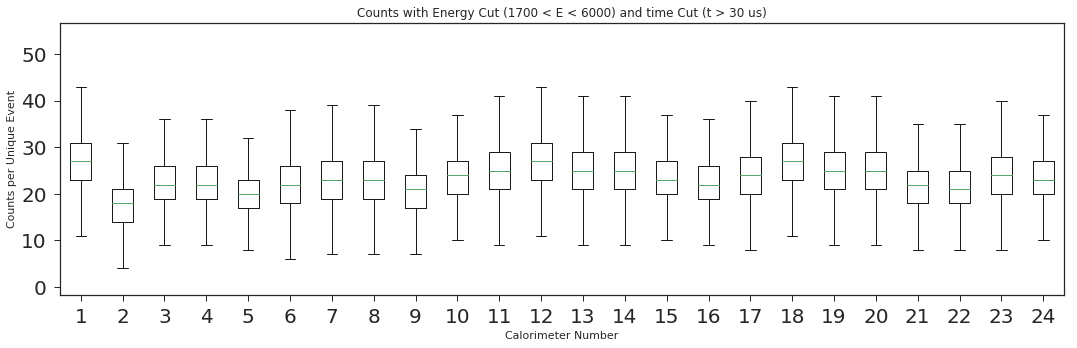

In [15]:
dataEnergyCut = []
for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    dataEnergyCut.append(caloDatai['Counts'])
fig, ax = plt.subplots(figsize=(18, 5))
ax.boxplot(dataEnergyCut)
plt.xlabel('Calorimeter Number')
plt.ylabel('Counts per Unique Event')
plt.title('Counts with Energy Cut (1700 < E < 6000) and time Cut (t > 30 us)')
plt.show()

Nope! If anything, it just makes everything clump closer together... Hmmmm

In [16]:
caloDataXInt = pandas.read_csv("./data/calo_data_output_xIntercept.csv")
caloDataXInt.head()

,Par0,Par0Err,Par1,Par1Err,CaloNum
0,-0.000190,2.679656e-07,2883.521876,0.781788,1
1,-0.000285,4.841013e-07,2737.854376,1.078235,2
2,-0.000283,4.020058e-07,2764.254587,0.808987,3
3,-0.000265,3.648094e-07,2767.763074,0.725848,4
4,-0.000292,5.378535e-07,2811.783892,1.473246,5


In [17]:
caloDataEnergyCut.describe()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
count,454904.000000,4.549040e+05,454904.000000,454904.00000,454904.000000,454904.000000
mean,12.499967,1.595299e+12,15952.970732,233.66585,80.469912,23.465758
std,6.922208,2.114230e+09,21.142742,143.84307,45.929507,6.148693
min,1.000000,1.592101e+12,15921.000000,0.00000,1.000000,1.000000
25%,6.000000,1.593500e+12,15935.000000,100.00000,41.000000,19.000000
50%,12.000000,1.594901e+12,15949.000000,230.00000,80.000000,23.000000
75%,19.000000,1.597303e+12,15973.000000,360.00000,119.000000,27.000000
max,24.000000,1.598905e+12,15989.000000,496.00000,284.000000,54.000000


[(26.974306215046955, 2883.521875536584, '1', 6.311504685147005, 0.7817879331583022), (17.78363406141184, 2737.854376048288, '2', 4.804529705081141, 1.0782347700086456), (22.55761316872428, 2764.254587229305, '3', 5.589350333049099, 0.8089871531672591), (22.585610296444774, 2767.763073739194, '4', 5.597932131304724, 0.7258480761573709), (20.08715838345468, 2811.783892252652, '5', 5.194156837596443, 1.473245994408933), (22.20507544581619, 2765.434170455375, '6', 5.525810238017972, 0.9287755124974588), (23.394586894586894, 2802.3563967754394, '7', 5.6800586019228785, 0.9194005500978016), (22.80431571172312, 2755.4527784231464, '8', 5.596895253476203, 0.6850420011128283), (20.823687681350567, 2740.5091002623817, '9', 5.3154712571521445, 0.7799988614429975), (23.633797615279097, 2803.132660352266, '10', 5.749300867746941, 0.9104434861601703), (25.448559670781894, 2849.8828324797432, '11', 6.031470719282435, 0.8082504820806571), (27.166191832858498, 2921.109205437848, '12', 6.31469730751229

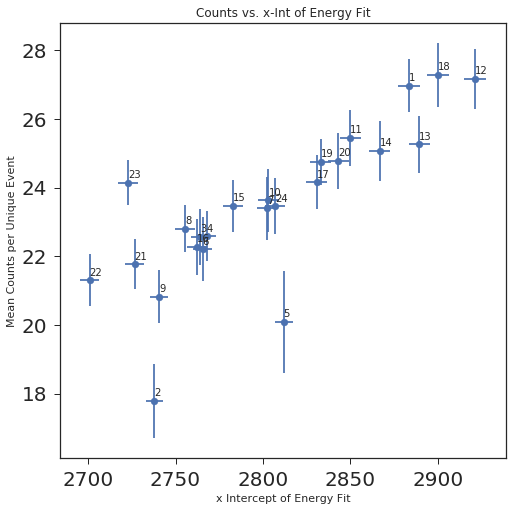

In [18]:
dataEnergyScatter = []
label = []
for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    intDatai = caloDataXInt.loc[caloDataXInt['CaloNum'] == i]
    dataEnergyScatter.append(((caloDatai['Counts']).mean(),intDatai['Par1'].mean(),str(i),caloDatai['Counts'].std(),intDatai['Par1Err'].mean()))
    label.append(str(i))
    
print(dataEnergyScatter)

fig, ax = plt.subplots(figsize=(8, 8))
y,x,z,yerr,xerr = zip(*dataEnergyScatter)
plt.scatter(x, y)
plt.xlabel('x Intercept of Energy Fit')
plt.ylabel('Mean Counts per Unique Event')
plt.title('Counts vs. x-Int of Energy Fit')
plt.errorbar(x, y, xerr, yerr, ls='none')
for j,i,label,yerr,xerr in dataEnergyScatter:
    print(i,j)
    ax.annotate(label, xy=(i,j), xytext=(0,5), textcoords='offset points')
plt.show()

-3.0245002253428237 2549.9999962747097 27.220500225342825 3050.0000037252903
0.038461538461538464
-3.0245002253428237 8.846153846153847 27.220500225342825 41.15384615384615


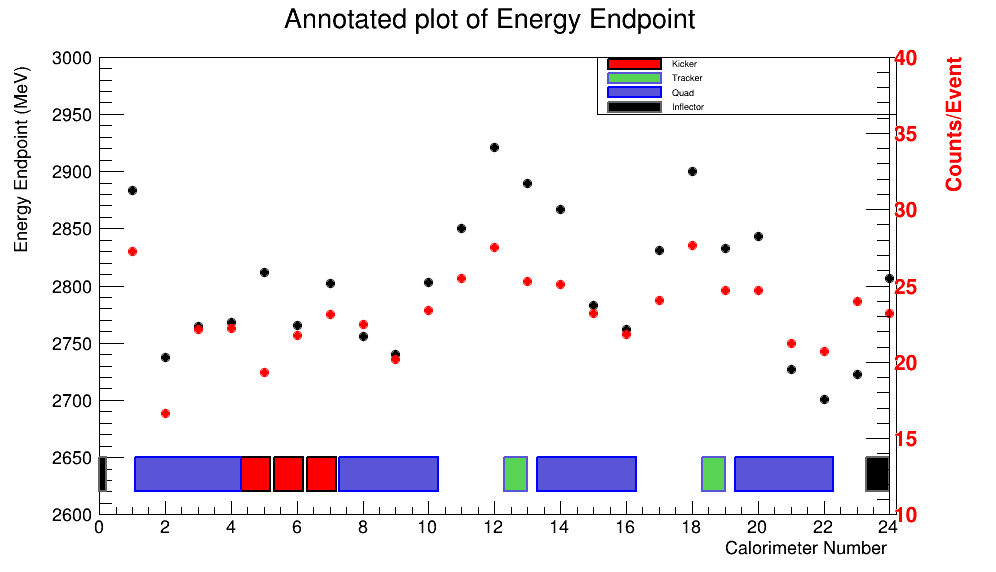

In [19]:
c = r.TCanvas("c","c",1000,600)
counts,energy,label,countsErr,energyErr = zip(*dataEnergyScatter)

pad1 = r.TPad("pad1","",0,0,1,1)
pad2 = r.TPad("pad2","",0,0,1,1)
pad2.SetFillStyle(4000) #will be transparent
pad1.Draw()
pad1.cd()

graph = r.TGraphErrors()
for i in range(len(counts)):
    graph.SetPoint(i,r.Double(label[i]),r.Double(energy[i]))
    graph.SetPointError(i,0,energyErr[i])
    
graph.SetMarkerSize(1)
graph.SetMarkerStyle(20)
graph.Draw("a p0 e0")
graph.GetYaxis().SetRangeUser(2600,3000)
graph.GetXaxis().SetRangeUser(0,24)

graph.GetYaxis().SetTitle("Energy Endpoint (MeV)")
graph.GetXaxis().SetTitle("Calorimeter Number")
graph.SetTitle("Annotated plot of Energy Endpoint")

minpos = 2620
maxpos = 2650
maxpos2 = 2650

#kicker1 = r.TBox(3.5,2620,4.25,2650)
kicker1 = r.TBox(4.3,minpos,5.2,maxpos)
kicker1.SetFillColor(2)
kicker1.SetLineColor(1)
kicker1.SetLineWidth(2)
kicker1.Draw("FL SAME")

#kicker2 = r.TBox(4.5,2620,5.25,2650)
kicker2 = r.TBox(5.3,minpos,6.2,maxpos)
kicker2.SetFillColor(2)
kicker2.SetLineColor(1)
kicker2.SetLineWidth(2)
kicker2.Draw("FL SAME")

#kicker3 = r.TBox(5.5,2620,6.3,2650)
kicker3 = r.TBox(6.3,minpos,7.2,maxpos)
kicker3.SetFillColor(2)
kicker3.SetLineColor(1)
kicker3.SetLineWidth(2)
kicker3.Draw("FL SAME")

#tracker1 = r.TBox(11.6,2620,12.7,2630)
tracker1 = r.TBox(12.3,minpos,13,maxpos2)
tracker1.SetFillColor(8)
tracker1.SetLineColor(9)
tracker1.SetLineWidth(2)
tracker1.Draw("FL SAME")

#tracker2 = r.TBox(17.9,2620,18.8,2630)
tracker2 = r.TBox(18.3,minpos,19,maxpos2)
tracker2.SetFillColor(8)
tracker2.SetLineColor(9)
tracker2.SetLineWidth(2)
tracker2.Draw("FL SAME")

tracker3 = r.TBox(0.3,minpos,1,maxpos2)
tracker3.SetFillColor(8)
tracker3.SetLineColor(9)
tracker3.SetLineWidth(2)
#tracker3.Draw("FL SAME") #doesn't really exist :(

'''
col1 = r.TBox(15.9,2620,15.9,2650)
col1.SetFillColor(22)
col1.SetLineColor(23)
col1.SetLineWidth(2)
col1.Draw("FL SAME")

col2 = r.TBox(19.7,2620,19.7,2650)
col2.SetFillColor(22)
col2.SetLineColor(23)
col2.SetLineWidth(2)
col2.Draw("FL SAME")
'''

quad1 = r.TBox(1.1,minpos,4.3,maxpos2)
quad1.SetFillColor(9)
quad1.SetLineColor(4)
quad1.SetLineWidth(2)
quad1.Draw("FL SAME")

quad2 = r.TBox(7.3,minpos,10.3,maxpos2)
quad2.SetFillColor(9)
quad2.SetLineColor(4)
quad2.SetLineWidth(2)
quad2.Draw("FL SAME")

quad3 = r.TBox(13.3,minpos,16.3,maxpos2)
quad3.SetFillColor(9)
quad3.SetLineColor(4)
quad3.SetLineWidth(2)
quad3.Draw("FL SAME")

quad4 = r.TBox(19.3,minpos,22.3,maxpos2)
quad4.SetFillColor(9)
quad4.SetLineColor(4)
quad4.SetLineWidth(2)
quad4.Draw("FL SAME")

inf1 = r.TBox(23.3,minpos,24,maxpos2)
inf1.SetFillColor(1)
inf1.SetLineColor(13)
inf1.SetLineWidth(2)
inf1.Draw("FL SAME")

inf2 = r.TBox(0,minpos,0.2,maxpos2)
inf2.SetFillColor(1)
inf2.SetLineColor(13)
inf2.SetLineWidth(2)
inf2.Draw("FL SAME")

leg = r.TLegend(.6,.8,.9,.9)
#leg.AddEntry(graph,"Energy Endpoint","pl")
leg.AddEntry(kicker1,"Kicker","f")
leg.AddEntry(tracker2,"Tracker","f")
#leg.AddEntry(col1,"Collimator","f")
leg.AddEntry(quad1,"Quad","f")
leg.AddEntry(inf1,"Inflector","f")
leg.Draw("SAME")
pad1.Update()


x1 = r.Double(0.0)
y1 = r.Double(0.0)
x2 = r.Double(0.0)
y2 = r.Double(0.0)
pad1.GetRange(x1,y1,x2,y2)
print(x1,y1,x2,y2)

padding = 100/2600
print(padding)


low = 10
high = 40

pad2.Range(x1,low-padding*(high-low),x2,high+padding*(high-low))
print(x1,low-padding*(high-low),x2,high+padding*(high-low))

pad2.Draw()
pad2.cd()
graph2 = r.TGraphErrors()
for i in range(len(counts)):
    graph2.SetPoint(i,r.Double(label[i]),r.Double(counts[i]))
#    graph2.SetPointError(i,0,countsErr[i])
    graph2.SetPointError(i,0,0)

graph2.SetMarkerSize(1)
graph2.SetMarkerStyle(20)
graph2.SetMarkerColor(2)
graph2.SetLineColor(2)
graph2.GetYaxis().SetRangeUser(0,50)
graph2.GetXaxis().SetRangeUser(0,24)
graph2.Draw("p")
pad2.Update()

pad1.cd()

axis = r.TGaxis(24,2600,24,3000,low,high,510,"+L");
axis.SetLabelColor(2)
axis.SetTitleColor(2)
axis.SetTitle("Counts/Event")
axis.Draw()


c.Draw()

In [20]:
caloDataMean = pandas.read_csv("./data/calo_data_output_xMean_500_4500.csv")
caloDataMean.head()

,Mean,MeanErr,CaloNum
0,1446.210241,0.059330,1
1,1348.201716,0.060870,2
2,1372.689393,0.056530,3
3,1389.522836,0.058069,4
4,1343.267534,0.056341,5


In [21]:
caloDataMean.describe()

,Mean,MeanErr,CaloNum
count,24.000000,24.000000,24.000000
mean,1402.989085,0.058638,12.500000
std,31.060226,0.001247,7.071068
min,1343.267534,0.056341,1.000000
25%,1382.566737,0.057771,6.750000
50%,1401.101467,0.058590,12.500000
75%,1424.643962,0.059319,18.250000
max,1459.970298,0.061070,24.000000


[(26.974306215046955, 1446.2102406495897, '1', 6.311504685147005, 0.05932965477704396), (17.78363406141184, 1348.2017156905767, '2', 4.804529705081141, 0.060869676312336786), (22.55761316872428, 1372.6893927789931, '3', 5.589350333049099, 0.05653043299808794), (22.585610296444774, 1389.5228360490046, '4', 5.597932131304724, 0.058069064455229365), (20.08715838345468, 1343.26753353423, '5', 5.194156837596443, 0.05634137562844312), (22.20507544581619, 1383.6976824928495, '6', 5.525810238017972, 0.0579918449652943), (23.394586894586894, 1403.4088991450515, '7', 5.6800586019228785, 0.058821119447774864), (22.80431571172312, 1387.901647869654, '8', 5.596895253476203, 0.05759349173582823), (20.823687681350567, 1379.1738987148547, '9', 5.3154712571521445, 0.05917598016423239), (23.633797615279097, 1398.7940352410262, '10', 5.749300867746941, 0.05835949258583559), (25.448559670781894, 1433.3403218736605, '11', 6.031470719282435, 0.05901321462596744), (27.166191832858498, 1454.161207012073, '12'

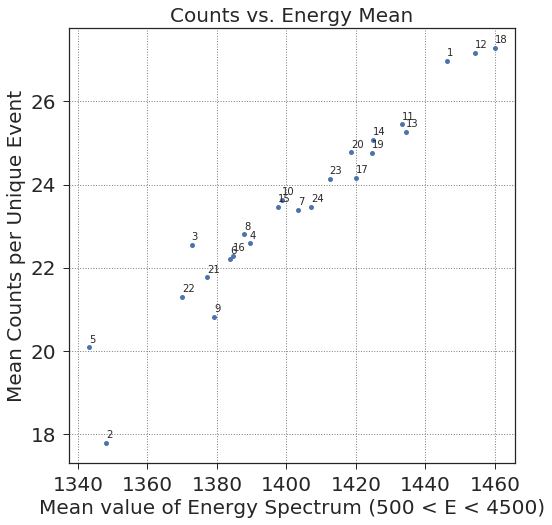

In [22]:
dataEnergyScatter = []
label = []

for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    intDatai = caloDataMean.loc[caloDataMean['CaloNum'] == i]
    dataEnergyScatter.append(((caloDatai['Counts']).mean(),intDatai['Mean'].mean(),str(i),caloDatai['Counts'].std(),intDatai['MeanErr'].mean()))
    label.append(str(i))
    
print(dataEnergyScatter)
    
fig, ax = plt.subplots(figsize=(8, 8))
Counts,Mean,z,CountsErr,MeanErr = zip(*dataEnergyScatter)

print(Mean)

plt.xlabel('Mean value of Energy Spectrum (500 < E < 4500)',size=20)
plt.ylabel('Mean Counts per Unique Event',size=20)
plt.title('Counts vs. Energy Mean',size=20)
plt.errorbar(x = Mean, y = Counts, yerr = 0, xerr = MeanErr, ls='none',markersize=5,fmt='o')
for j,i,label,yerr,xerr in dataEnergyScatter:
    ax.annotate(label, xy=(i,j), xytext=(0,5), textcoords='offset points')

ax.grid(color='grey', linestyle=':', linewidth=1)
plt.show()

0.0 1300.0 24.196 1480.0
-3.0245002253428237 1277.4999983236194 27.220500225342825 1502.5000016763806
180.0 225.00000335276127
0.2500000186264515
-3.0245002253428237 2.4999994412064552 27.220500225342825 47.500000558793545
1331.5292743851583 1471.7122876664805


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


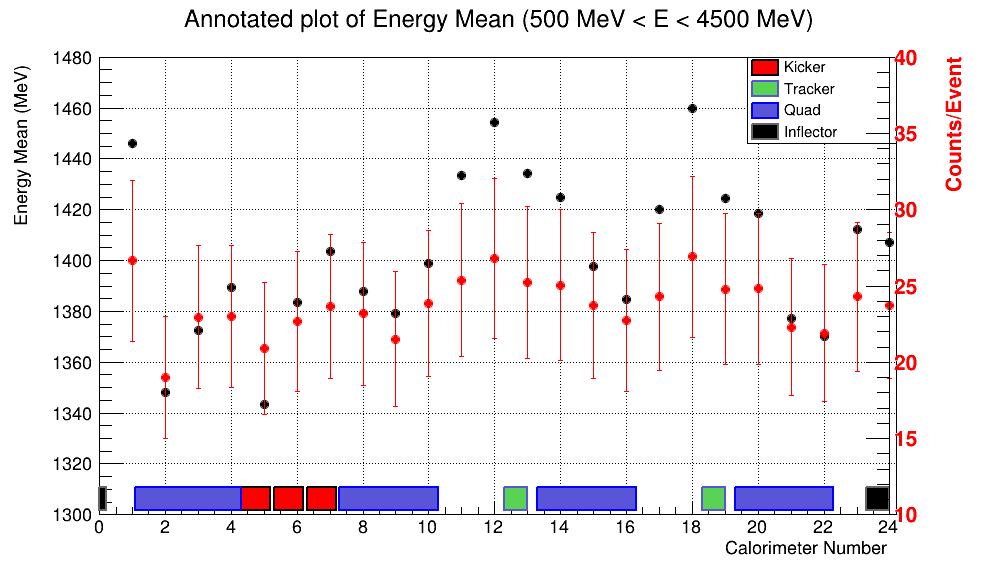

In [23]:
c = r.TCanvas("c","c",1000,600)
counts,energy,label,countsErr,energyErr = zip(*dataEnergyScatter)

pad1 = r.TPad("pad1","",0,0,1,1)
pad2 = r.TPad("pad2","",0,0,1,1)
pad2.SetFillStyle(4000) #will be transparent
pad1.Draw()
pad1.cd()

graph = r.TGraphErrors()
for i in range(len(counts)):
    graph.SetPoint(i,r.Double(label[i]),r.Double(energy[i]))
    graph.SetPointError(i,0,energyErr[i])
    
yMin = 1300
yMax = 1480

graph.SetMarkerSize(1)
graph.SetMarkerStyle(20)
graph.Draw("a p0 e0")
graph.GetYaxis().SetRangeUser(yMin,yMax)
graph.GetXaxis().SetRangeUser(0,24)

graph.GetYaxis().SetTitle("Energy Mean (MeV)")
graph.GetXaxis().SetTitle("Calorimeter Number")
graph.SetTitle("Annotated plot of Energy Mean (500 MeV < E < 4500 MeV)")

minpos = yMin + (yMax - yMin)*0.01
maxpos = minpos+ (yMax - yMin)*0.05
maxpos2 = maxpos

#kicker1 = r.TBox(3.5,2620,4.25,2650)
kicker1 = r.TBox(4.3,minpos,5.2,maxpos)
kicker1.SetFillColor(2)
kicker1.SetLineColor(1)
kicker1.SetLineWidth(2)
kicker1.Draw("FL SAME")

#kicker2 = r.TBox(4.5,2620,5.25,2650)
kicker2 = r.TBox(5.3,minpos,6.2,maxpos)
kicker2.SetFillColor(2)
kicker2.SetLineColor(1)
kicker2.SetLineWidth(2)
kicker2.Draw("FL SAME")

#kicker3 = r.TBox(5.5,2620,6.3,2650)
kicker3 = r.TBox(6.3,minpos,7.2,maxpos)
kicker3.SetFillColor(2)
kicker3.SetLineColor(1)
kicker3.SetLineWidth(2)
kicker3.Draw("FL SAME")

#tracker1 = r.TBox(11.6,2620,12.7,2630)
tracker1 = r.TBox(12.3,minpos,13,maxpos2)
tracker1.SetFillColor(8)
tracker1.SetLineColor(9)
tracker1.SetLineWidth(2)
tracker1.Draw("FL SAME")

#tracker2 = r.TBox(17.9,2620,18.8,2630)
tracker2 = r.TBox(18.3,minpos,19,maxpos2)
tracker2.SetFillColor(8)
tracker2.SetLineColor(9)
tracker2.SetLineWidth(2)
tracker2.Draw("FL SAME")

tracker3 = r.TBox(0.3,minpos,1,maxpos2)
tracker3.SetFillColor(8)
tracker3.SetLineColor(9)
tracker3.SetLineWidth(2)
#tracker3.Draw("FL SAME") #doesn't really exist :(

'''
col1 = r.TBox(15.9,2620,15.9,2650)
col1.SetFillColor(22)
col1.SetLineColor(23)
col1.SetLineWidth(2)
col1.Draw("FL SAME")

col2 = r.TBox(19.7,2620,19.7,2650)
col2.SetFillColor(22)
col2.SetLineColor(23)
col2.SetLineWidth(2)
col2.Draw("FL SAME")
'''

quad1 = r.TBox(1.1,minpos,4.3,maxpos2)
quad1.SetFillColor(9)
quad1.SetLineColor(4)
quad1.SetLineWidth(2)
quad1.Draw("FL SAME")

quad2 = r.TBox(7.3,minpos,10.3,maxpos2)
quad2.SetFillColor(9)
quad2.SetLineColor(4)
quad2.SetLineWidth(2)
quad2.Draw("FL SAME")

quad3 = r.TBox(13.3,minpos,16.3,maxpos2)
quad3.SetFillColor(9)
quad3.SetLineColor(4)
quad3.SetLineWidth(2)
quad3.Draw("FL SAME")

quad4 = r.TBox(19.3,minpos,22.3,maxpos2)
quad4.SetFillColor(9)
quad4.SetLineColor(4)
quad4.SetLineWidth(2)
quad4.Draw("FL SAME")

inf1 = r.TBox(23.3,minpos,24,maxpos2)
inf1.SetFillColor(1)
inf1.SetLineColor(13)
inf1.SetLineWidth(2)
inf1.Draw("FL SAME")

inf2 = r.TBox(0,minpos,0.2,maxpos2)
inf2.SetFillColor(1)
inf2.SetLineColor(13)
inf2.SetLineWidth(2)
inf2.Draw("FL SAME")

leg = r.TLegend(.75,.75,.9,.9)
#leg.AddEntry(graph,"Energy Endpoint","pl")
leg.AddEntry(kicker1,"Kicker","f")
leg.AddEntry(tracker2,"Tracker","f")
#leg.AddEntry(col1,"Collimator","f")
leg.AddEntry(quad1,"Quad","f")
leg.AddEntry(inf1,"Inflector","f")
leg.Draw("SAME")
pad1.Update()


x1 = r.Double(0.0)
y1 = r.Double(0.0)
x2 = r.Double(0.0)
y2 = r.Double(0.0)
pad1.GetRangeAxis(x1,y1,x2,y2)
print(x1,y1,x2,y2)
yRangeRestricted = r.TMath.Abs(y1-y2)

pad1.GetRange(x1,y1,x2,y2)
print(x1,y1,x2,y2)

yRangeFull = r.TMath.Abs(y1-y2)

print(yRangeRestricted,yRangeFull)

padding = (yRangeFull-yRangeRestricted)/yRangeRestricted
print(padding)

low = 10
high = 40

pad2.Range(x1,low-padding*(high-low),x2,high+padding*(high-low))
print(x1,low-padding*(high-low),x2,high+padding*(high-low))

pad2.Draw()
pad2.cd()
graph2 = r.TGraphErrors()
for i in range(len(counts)):
    graph2.SetPoint(i,r.Double(label[i]),r.Double(counts[i]))
    graph2.SetPointError(i,0,countsErr[i])

graph2.SetMarkerSize(1)
graph2.SetMarkerStyle(20)
graph2.SetMarkerColor(2)
graph2.SetLineColor(2)
graph2.GetYaxis().SetRangeUser(0,50)
graph2.GetXaxis().SetRangeUser(0,24)
graph2.Draw("p")
pad2.Update()

pad1.cd()
pad1.SetGridx()
pad1.SetGridy()

print(graph.GetYaxis().GetXmin(),graph.GetYaxis().GetXmax())

axis = r.TGaxis(24,yMin,24,yMax,low,high,510,"+L");
axis.SetLabelColor(2)
axis.SetTitleColor(2)
axis.SetTitle("Counts/Event")
axis.Draw()

c.Draw()

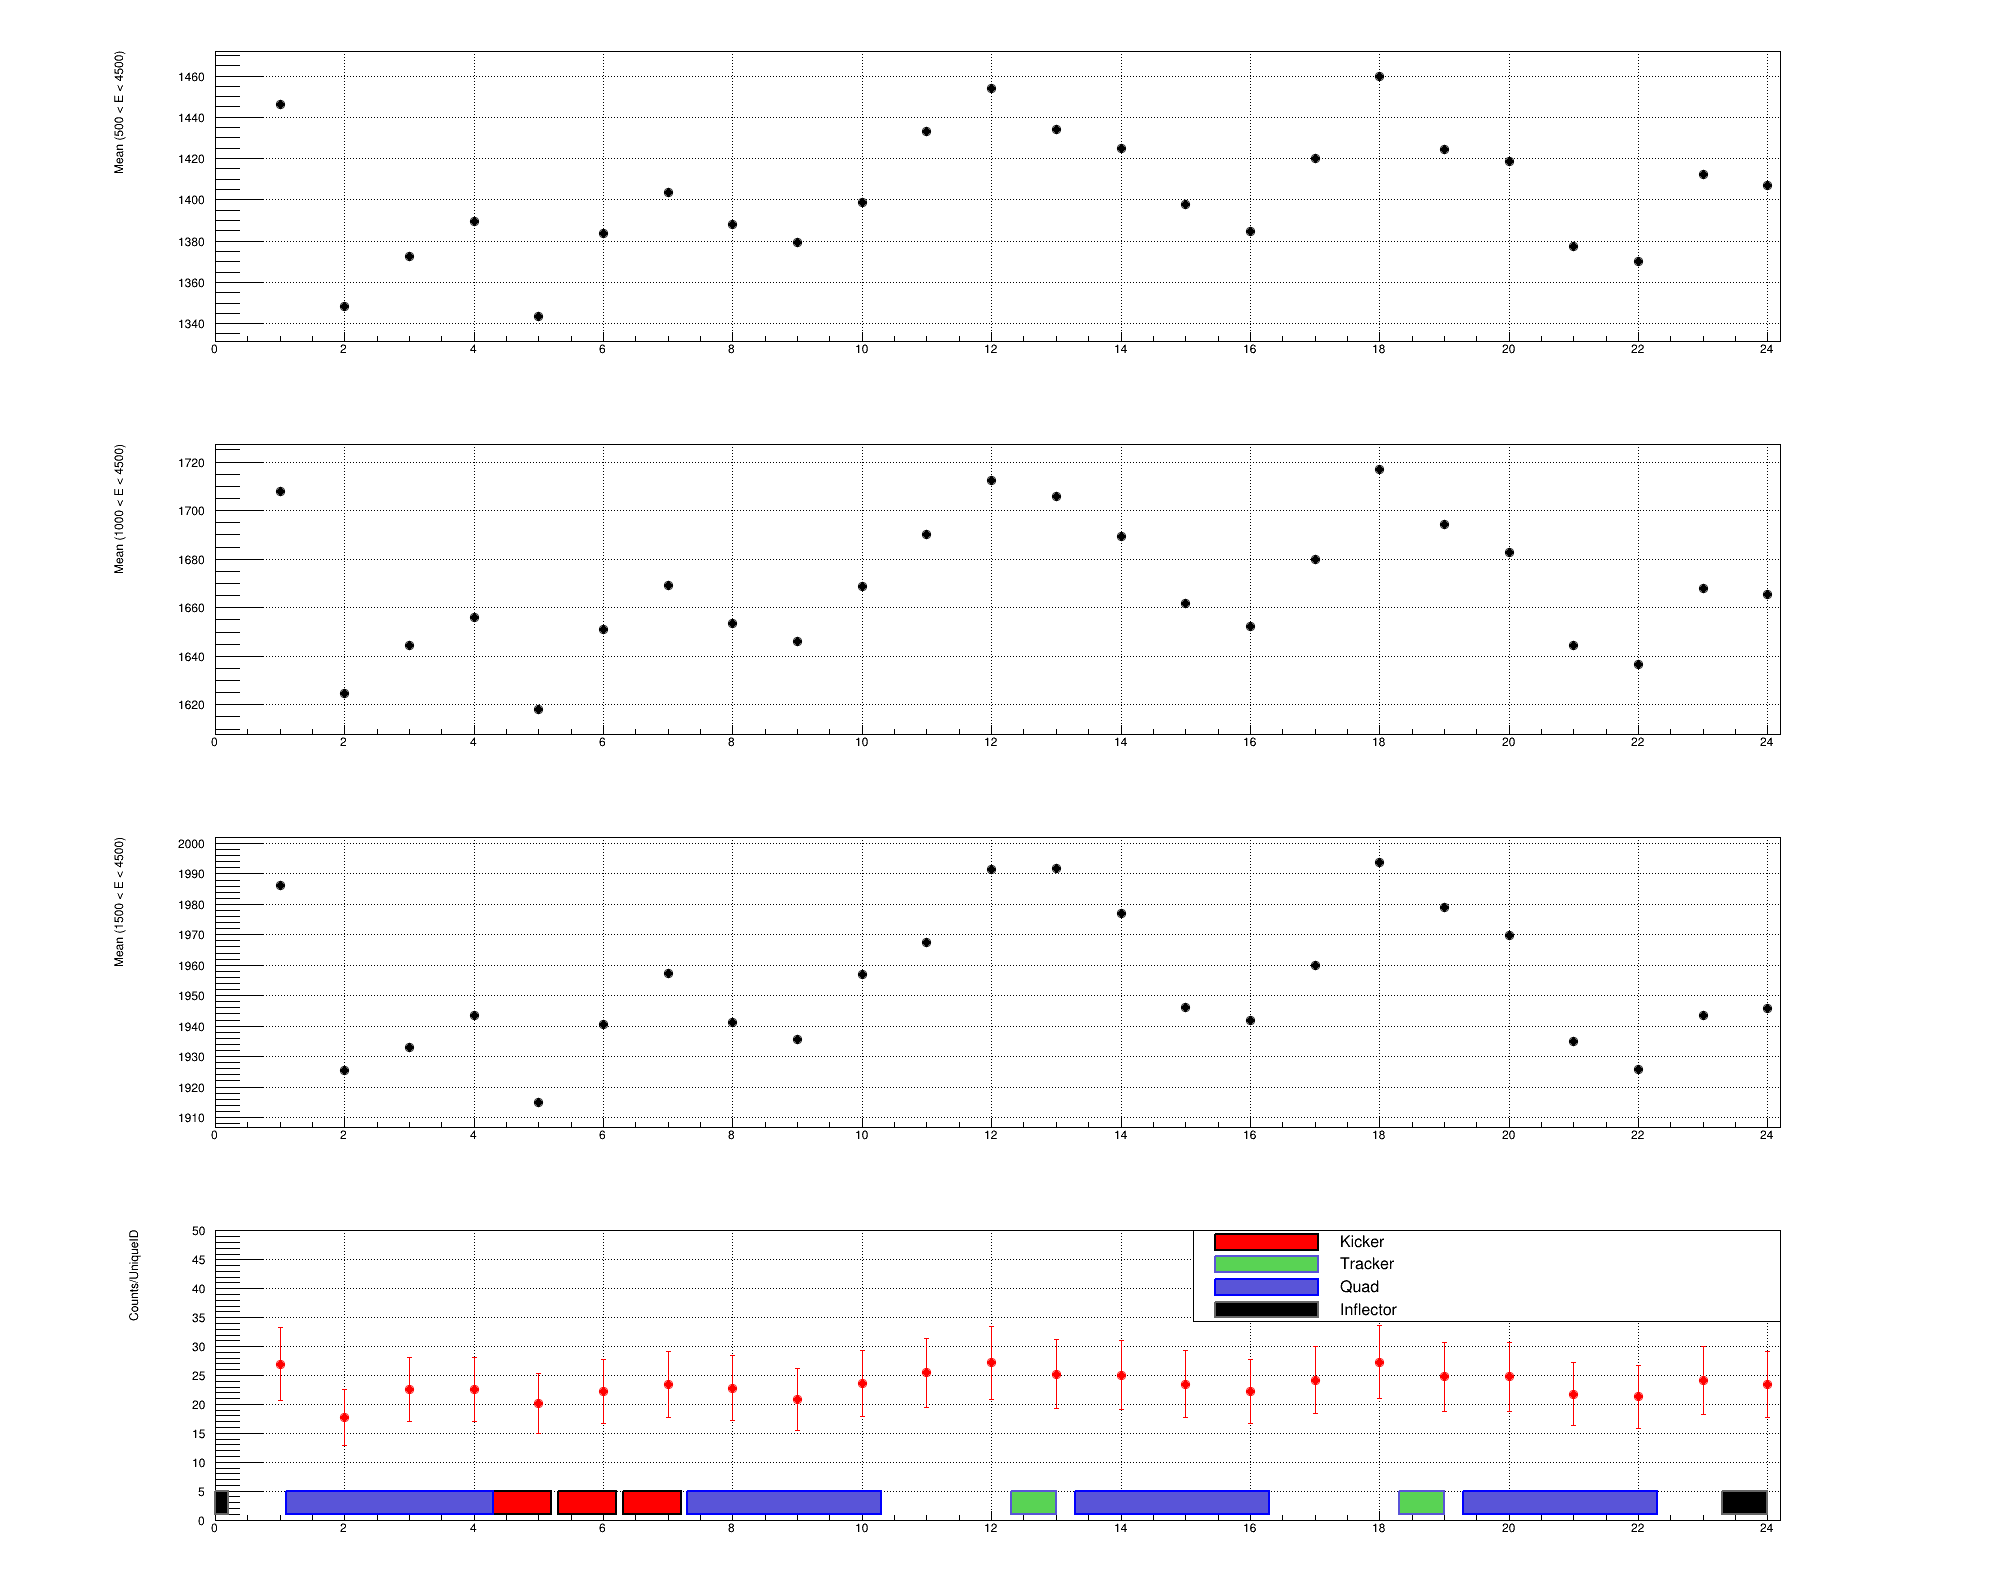

In [24]:
c3 = r.TCanvas("c3","c3",2000,1600)
c3.Divide(1,4)
c3.cd(1)

caloDataMean = pandas.read_csv("./data/calo_data_output_xMean_500_4500.csv")
dataEnergyScatter500 = []
label = []

for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    intDatai = caloDataMean.loc[caloDataXInt['CaloNum'] == i]
    dataEnergyScatter500.append(((caloDatai['Counts']).mean(),intDatai['Mean'].mean(),str(i),caloDatai['Counts'].std(),intDatai['MeanErr'].mean()))
    label.append(str(i))

counts,energy,label,countsErr,energyErr = zip(*dataEnergyScatter500)
graph500 = r.TGraphErrors()
for i in range(len(counts)):
    graph500.SetPoint(i,r.Double(label[i]),r.Double(energy[i]))
    graph500.SetPointError(i,0,energyErr[i])
graph500.SetMarkerSize(1)
graph500.SetMarkerStyle(20)
graph500.GetXaxis().SetRangeUser(0,24)
graph500.GetYaxis().SetTitle("Mean (500 < E < 4500)")
graph500.Draw("a p0 e0")
c3.Draw()

caloDataMean = pandas.read_csv("./data/calo_data_output_xMean_1000_4500.csv")
dataEnergyScatter1000 = []
label = []

for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    intDatai = caloDataMean.loc[caloDataXInt['CaloNum'] == i]
    dataEnergyScatter1000.append(((caloDatai['Counts']).mean(),intDatai['Mean'].mean(),str(i),caloDatai['Counts'].std(),intDatai['MeanErr'].mean()))
    label.append(str(i))

c3.cd(2)

counts,energy,label,countsErr,energyErr = zip(*dataEnergyScatter1000)
graph1000 = r.TGraphErrors()
for i in range(len(counts)):
    graph1000.SetPoint(i,r.Double(label[i]),r.Double(energy[i]))
    graph1000.SetPointError(i,0,energyErr[i])
graph1000.SetMarkerSize(1)
graph1000.SetMarkerStyle(20)
graph1000.GetXaxis().SetRangeUser(0,24)
graph1000.GetYaxis().SetTitle("Mean (1000 < E < 4500)")
graph1000.Draw("a p0 e0")
c3.Draw()

caloDataMean = pandas.read_csv("./data/calo_data_output_xMean_1500_4500.csv")
dataEnergyScatter1500 = []
label = []

for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    intDatai = caloDataMean.loc[caloDataXInt['CaloNum'] == i]
    dataEnergyScatter1500.append(((caloDatai['Counts']).mean(),intDatai['Mean'].mean(),str(i),caloDatai['Counts'].std(),intDatai['MeanErr'].mean()))
    label.append(str(i))

c3.cd(3)

counts,energy,label,countsErr,energyErr = zip(*dataEnergyScatter1500)
graph1500 = r.TGraphErrors()
for i in range(len(counts)):
    graph1500.SetPoint(i,r.Double(label[i]),r.Double(energy[i]))
    graph1500.SetPointError(i,0,energyErr[i])
graph1500.SetMarkerSize(1)
graph1500.SetMarkerStyle(20)
graph1500.GetXaxis().SetRangeUser(0,24)
graph1500.GetYaxis().SetTitle("Mean (1500 < E < 4500)")
graph1500.Draw("a p0 e0")
c3.Draw()

c3.cd(4)
graph2.Draw("a p0 e0")
graph2.GetYaxis().SetTitle("Counts/UniqueID")

minpos = 1
maxpos = 5
maxpos2 = maxpos

#kicker1 = r.TBox(3.5,2620,4.25,2650)
kicker1 = r.TBox(4.3,minpos,5.2,maxpos)
kicker1.SetFillColor(2)
kicker1.SetLineColor(1)
kicker1.SetLineWidth(2)
kicker1.Draw("FL SAME")

#kicker2 = r.TBox(4.5,2620,5.25,2650)
kicker2 = r.TBox(5.3,minpos,6.2,maxpos)
kicker2.SetFillColor(2)
kicker2.SetLineColor(1)
kicker2.SetLineWidth(2)
kicker2.Draw("FL SAME")

#kicker3 = r.TBox(5.5,2620,6.3,2650)
kicker3 = r.TBox(6.3,minpos,7.2,maxpos)
kicker3.SetFillColor(2)
kicker3.SetLineColor(1)
kicker3.SetLineWidth(2)
kicker3.Draw("FL SAME")

#tracker1 = r.TBox(11.6,2620,12.7,2630)
tracker1 = r.TBox(12.3,minpos,13,maxpos2)
tracker1.SetFillColor(8)
tracker1.SetLineColor(9)
tracker1.SetLineWidth(2)
tracker1.Draw("FL SAME")

#tracker2 = r.TBox(17.9,2620,18.8,2630)
tracker2 = r.TBox(18.3,minpos,19,maxpos2)
tracker2.SetFillColor(8)
tracker2.SetLineColor(9)
tracker2.SetLineWidth(2)
tracker2.Draw("FL SAME")

tracker3 = r.TBox(0.3,minpos,1,maxpos2)
tracker3.SetFillColor(8)
tracker3.SetLineColor(9)
tracker3.SetLineWidth(2)
#tracker3.Draw("FL SAME") #doesn't really exist :(

'''
col1 = r.TBox(15.9,2620,15.9,2650)
col1.SetFillColor(22)
col1.SetLineColor(23)
col1.SetLineWidth(2)
col1.Draw("FL SAME")

col2 = r.TBox(19.7,2620,19.7,2650)
col2.SetFillColor(22)
col2.SetLineColor(23)
col2.SetLineWidth(2)
col2.Draw("FL SAME")
'''

quad1 = r.TBox(1.1,minpos,4.3,maxpos2)
quad1.SetFillColor(9)
quad1.SetLineColor(4)
quad1.SetLineWidth(2)
quad1.Draw("FL SAME")

quad2 = r.TBox(7.3,minpos,10.3,maxpos2)
quad2.SetFillColor(9)
quad2.SetLineColor(4)
quad2.SetLineWidth(2)
quad2.Draw("FL SAME")

quad3 = r.TBox(13.3,minpos,16.3,maxpos2)
quad3.SetFillColor(9)
quad3.SetLineColor(4)
quad3.SetLineWidth(2)
quad3.Draw("FL SAME")

quad4 = r.TBox(19.3,minpos,22.3,maxpos2)
quad4.SetFillColor(9)
quad4.SetLineColor(4)
quad4.SetLineWidth(2)
quad4.Draw("FL SAME")

inf1 = r.TBox(23.3,minpos,24,maxpos2)
inf1.SetFillColor(1)
inf1.SetLineColor(13)
inf1.SetLineWidth(2)
inf1.Draw("FL SAME")

inf2 = r.TBox(0,minpos,0.2,maxpos2)
inf2.SetFillColor(1)
inf2.SetLineColor(13)
inf2.SetLineWidth(2)
inf2.Draw("FL SAME")

leg = r.TLegend(.6,.65,.9,.9)
leg.AddEntry(kicker1,"Kicker","f")
leg.AddEntry(tracker2,"Tracker","f")
leg.AddEntry(quad1,"Quad","f")
leg.AddEntry(inf1,"Inflector","f")
leg.Draw("SAME")

pad500 = c3.cd(1)
pad500.SetGridx()
pad500.SetGridy()
pad1000 = c3.cd(2)
pad1000.SetGridx()
pad1000.SetGridy()
pad1500 = c3.cd(3)
pad1500.SetGridx()
pad1500.SetGridy()
pad4 = c3.cd(4)
pad4.SetGridx()
pad4.SetGridy()

c3.Draw()

Now lets looks at the cluster mean x vs. calo num as well as the ctag vs. calo number

In [25]:
meanXCount = pandas.read_csv("./data/meanVecXCount.csv")
meanXCount.head()

,Calorimeter Number,Mean,StDev
0,1,3.554800,2.242480
1,2,3.063177,2.005921
2,3,3.633194,2.235403
3,4,3.592662,2.241422
4,5,3.847186,2.219742


In [26]:
meanYCount = pandas.read_csv("./data/meanVecYCount.csv")
meanYCount.head()

,Calorimeter Number,Mean,StDev
0,1,3.025972,1.136707
1,2,2.978624,1.254065
2,3,3.078519,1.192384
3,4,3.031554,1.194029
4,5,3.136399,1.228652


0.0 2.0 24.196 5.0
-3.0245002253428237 1.624999972060321 27.220500225342825 5.375000027939679
3.0 3.750000055879358
0.25000001862645266
-12.500000931322633 62.50000093132263
2.984776495901408 3.925586376257491


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


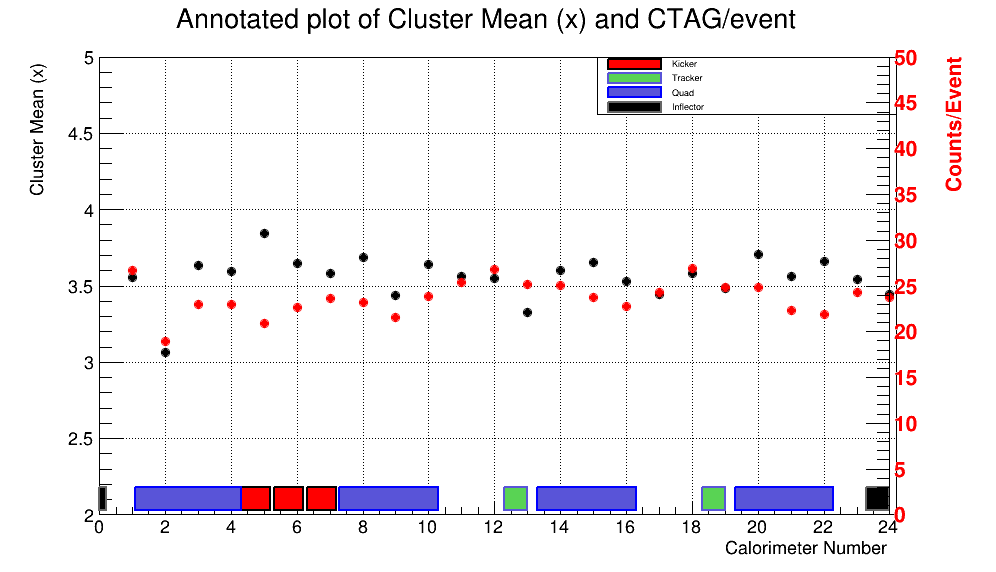

In [27]:
c = r.TCanvas("c","c",1000,600)
meanVecXCounts = []
label = []

for i in range(1,25):
    caloDatai = meanXCount.loc[meanXCount['Calorimeter Number'] == i]
    meanVecXCounts.append((str(i),caloDatai['Mean'].mean(),caloDatai['StDev'].mean()))
    label.append(str(i))

calonum, energy, energyErr = zip(*meanVecXCounts)

pad1 = r.TPad("pad1","",0,0,1,1)
pad2 = r.TPad("pad2","",0,0,1,1)
pad2.SetFillStyle(4000) #will be transparent
pad1.Draw()
pad1.cd()

graph = r.TGraphErrors()
for i in range(len(counts)):
    graph.SetPoint(i,r.Double(label[i]),r.Double(energy[i]))
#    graph.SetPointError(i,0,energyErr[i])
    graph.SetPointError(i,0,0)
    
yMin = 2
yMax = 5

graph.SetMarkerSize(1)
graph.SetMarkerStyle(20)
graph.Draw("a p0 e0")
graph.GetYaxis().SetRangeUser(yMin,yMax)
graph.GetXaxis().SetRangeUser(0,24)

graph.GetYaxis().SetTitle("Cluster Mean (x)")
graph.GetXaxis().SetTitle("Calorimeter Number")
graph.SetTitle("Annotated plot of Cluster Mean (x) and CTAG/event")

minpos = yMin + (yMax - yMin)*0.01
maxpos = minpos+ (yMax - yMin)*0.05
maxpos2 = maxpos

#kicker1 = r.TBox(3.5,2620,4.25,2650)
kicker1 = r.TBox(4.3,minpos,5.2,maxpos)
kicker1.SetFillColor(2)
kicker1.SetLineColor(1)
kicker1.SetLineWidth(2)
kicker1.Draw("FL SAME")

#kicker2 = r.TBox(4.5,2620,5.25,2650)
kicker2 = r.TBox(5.3,minpos,6.2,maxpos)
kicker2.SetFillColor(2)
kicker2.SetLineColor(1)
kicker2.SetLineWidth(2)
kicker2.Draw("FL SAME")

#kicker3 = r.TBox(5.5,2620,6.3,2650)
kicker3 = r.TBox(6.3,minpos,7.2,maxpos)
kicker3.SetFillColor(2)
kicker3.SetLineColor(1)
kicker3.SetLineWidth(2)
kicker3.Draw("FL SAME")

#tracker1 = r.TBox(11.6,2620,12.7,2630)
tracker1 = r.TBox(12.3,minpos,13,maxpos2)
tracker1.SetFillColor(8)
tracker1.SetLineColor(9)
tracker1.SetLineWidth(2)
tracker1.Draw("FL SAME")

#tracker2 = r.TBox(17.9,2620,18.8,2630)
tracker2 = r.TBox(18.3,minpos,19,maxpos2)
tracker2.SetFillColor(8)
tracker2.SetLineColor(9)
tracker2.SetLineWidth(2)
tracker2.Draw("FL SAME")

tracker3 = r.TBox(0.3,minpos,1,maxpos2)
tracker3.SetFillColor(8)
tracker3.SetLineColor(9)
tracker3.SetLineWidth(2)
#tracker3.Draw("FL SAME") #doesn't really exist :(

'''
col1 = r.TBox(15.9,2620,15.9,2650)
col1.SetFillColor(22)
col1.SetLineColor(23)
col1.SetLineWidth(2)
col1.Draw("FL SAME")

col2 = r.TBox(19.7,2620,19.7,2650)
col2.SetFillColor(22)
col2.SetLineColor(23)
col2.SetLineWidth(2)
col2.Draw("FL SAME")
'''

quad1 = r.TBox(1.1,minpos,4.3,maxpos2)
quad1.SetFillColor(9)
quad1.SetLineColor(4)
quad1.SetLineWidth(2)
quad1.Draw("FL SAME")

quad2 = r.TBox(7.3,minpos,10.3,maxpos2)
quad2.SetFillColor(9)
quad2.SetLineColor(4)
quad2.SetLineWidth(2)
quad2.Draw("FL SAME")

quad3 = r.TBox(13.3,minpos,16.3,maxpos2)
quad3.SetFillColor(9)
quad3.SetLineColor(4)
quad3.SetLineWidth(2)
quad3.Draw("FL SAME")

quad4 = r.TBox(19.3,minpos,22.3,maxpos2)
quad4.SetFillColor(9)
quad4.SetLineColor(4)
quad4.SetLineWidth(2)
quad4.Draw("FL SAME")

inf1 = r.TBox(23.3,minpos,24,maxpos2)
inf1.SetFillColor(1)
inf1.SetLineColor(13)
inf1.SetLineWidth(2)
inf1.Draw("FL SAME")

inf2 = r.TBox(0,minpos,0.2,maxpos2)
inf2.SetFillColor(1)
inf2.SetLineColor(13)
inf2.SetLineWidth(2)
inf2.Draw("FL SAME")

leg = r.TLegend(.6,.8,.9,.9)
#leg.AddEntry(graph,"Energy Endpoint","pl")
leg.AddEntry(kicker1,"Kicker","f")
leg.AddEntry(tracker2,"Tracker","f")
#leg.AddEntry(col1,"Collimator","f")
leg.AddEntry(quad1,"Quad","f")
leg.AddEntry(inf1,"Inflector","f")
leg.Draw("SAME")
pad1.Update()


x1 = r.Double(0.0)
y1 = r.Double(0.0)
x2 = r.Double(0.0)
y2 = r.Double(0.0)
pad1.GetRangeAxis(x1,y1,x2,y2)
print(x1,y1,x2,y2)
yRangeRestricted = r.TMath.Abs(y1-y2)

pad1.GetRange(x1,y1,x2,y2)
print(x1,y1,x2,y2)

yRangeFull = r.TMath.Abs(y1-y2)

print(yRangeRestricted,yRangeFull)

padding = (yRangeFull-yRangeRestricted)/yRangeRestricted
print(padding)

pad2.Range(x1,0-padding*50,x2,50+padding*50)
print(0-padding*50, 50+padding*50)

pad2.Draw()
pad2.cd()
graph2 = r.TGraphErrors()
for i in range(len(counts)):
    graph2.SetPoint(i,r.Double(label[i]),r.Double(counts[i]))
#    graph2.SetPointError(i,0,countsErr[i])
    graph2.SetPointError(i,0,0)

graph2.SetMarkerSize(1)
graph2.SetMarkerStyle(20)
graph2.SetMarkerColor(2)
graph2.SetLineColor(2)
graph2.GetYaxis().SetRangeUser(0,50)
graph2.GetXaxis().SetRangeUser(0,24)
graph2.Draw("p")
pad2.Update()

pad1.cd()
pad1.SetGridx()
pad1.SetGridy()
print(graph.GetYaxis().GetXmin(),graph.GetYaxis().GetXmax())

low = 0
high = 50
axis = r.TGaxis(24,yMin,24,yMax,low,high,510,"+L");
axis.SetLabelColor(2)
axis.SetTitleColor(2)
axis.SetTitle("Counts/Event")
axis.Draw()

c.Draw()

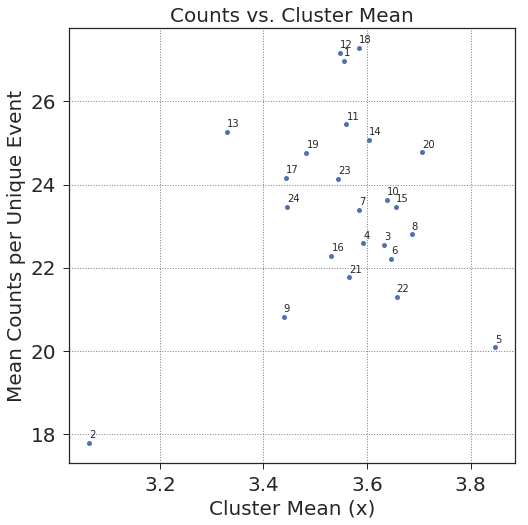

In [28]:
dataEnergyScatter = []
label = []

for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    intDatai = caloDataMean.loc[caloDataXInt['CaloNum'] == i]
    dataEnergyScatter.append(((caloDatai['Counts']).mean(),intDatai['Mean'].mean(),str(i),caloDatai['Counts'].std(),intDatai['MeanErr'].mean()))
    label.append(str(i))
    
meanVecXCounts = []
label = []

for i in range(1,25):
    caloDatai = meanXCount.loc[meanXCount['Calorimeter Number'] == i]
    meanVecXCounts.append((str(i),caloDatai['Mean'].mean(),caloDatai['StDev'].mean()))
    label.append(str(i))

calonum, energy, energyErr = zip(*meanVecXCounts)
    
fig, ax = plt.subplots(figsize=(8, 8))
Counts,Mean,z,CountsErr,MeanErr = zip(*dataEnergyScatter)
plt.xlabel('Cluster Mean (x)',size=20)
plt.ylabel('Mean Counts per Unique Event',size=20)
plt.title('Counts vs. Cluster Mean',size=20)
plt.errorbar(x = energy, y = Counts, yerr = 0, xerr = 0, ls='none',markersize=5,fmt='o')
ax.grid(color='grey', linestyle=':', linewidth=1)
for k,(j,i,label,yerr,xerr) in enumerate(dataEnergyScatter):
    ax.annotate(label, xy=(energy[k],j), xytext=(0,5), textcoords='offset points')
plt.show()

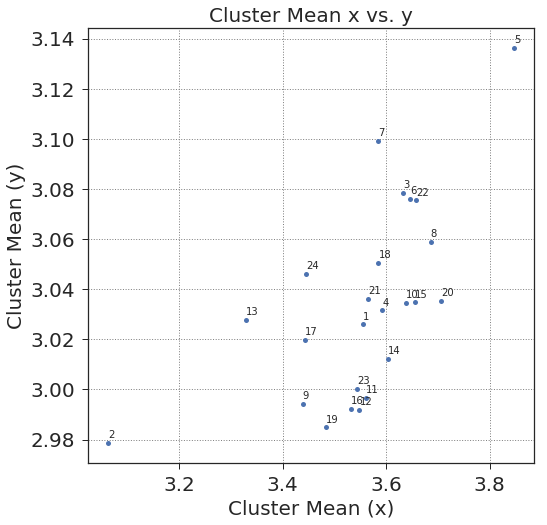

In [29]:
dataEnergyScatter = []
label = []

for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    intDatai = caloDataMean.loc[caloDataXInt['CaloNum'] == i]
    dataEnergyScatter.append(((caloDatai['Counts']).mean(),intDatai['Mean'].mean(),str(i),caloDatai['Counts'].std(),intDatai['MeanErr'].mean()))
    label.append(str(i))
    
meanVecXCounts = []

for i in range(1,25):
    caloDatai = meanXCount.loc[meanXCount['Calorimeter Number'] == i]
    meanVecXCounts.append((str(i),caloDatai['Mean'].mean(),caloDatai['StDev'].mean()))

calonum, energy, energyErr = zip(*meanVecXCounts)

meanVecYCounts = []
for i in range(1,25):
    caloDatai = meanYCount.loc[meanXCount['Calorimeter Number'] == i]
    meanVecYCounts.append((str(i),caloDatai['Mean'].mean(),caloDatai['StDev'].mean()))

calonum, energyY, energyErrY = zip(*meanVecYCounts)
    
fig, ax = plt.subplots(figsize=(8, 8))
Counts,Mean,z,CountsErr,MeanErr = zip(*dataEnergyScatter)
plt.xlabel('Cluster Mean (x)',size=20)
plt.ylabel('Cluster Mean (y)',size=20)
plt.title('Cluster Mean x vs. y',size=20)
plt.errorbar(x = energy, y = energyY, yerr = 0, xerr = 0, ls='none',markersize=5,fmt='o')
ax.grid(color='grey', linestyle=':', linewidth=1)
for k,(j,i,label,yerr,xerr) in enumerate(dataEnergyScatter):
    ax.annotate(label, xy=(energy[k],energyY[k]), xytext=(0,5), textcoords='offset points')
plt.show()